# Flights Evaluation in United States
## by Mohamed Asem

## Investigation Overview

> Analysis and evaluation of US flights during January 2020 and finding the most common reason of delay and what is most related to.

## Dataset Overview

> This dataset contains 29 columns and 607346 entry about flights data including reasons of delay, flight's time, carrier, distance, origin and destination.

> All the data is happening during January 2020.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('ONTIME_REPORTING.csv')
df.drop(['Unnamed: 29'], axis=1, inplace=True)
df.head(10)

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,...,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
0,2020,1,1,3,WN,N951WN,5888,ONT,SFO,1810,...,0.0,95.0,122.0,74.0,363.0,8.0,0.0,27.0,0.0,33.0
1,2020,1,1,3,WN,N467WN,6276,ONT,SFO,1150,...,0.0,90.0,92.0,71.0,363.0,NaN,NaN,NaN,NaN,NaN
2,2020,1,1,3,WN,N7885A,4598,ONT,SJC,2020,...,0.0,70.0,68.0,57.0,333.0,NaN,NaN,NaN,NaN,NaN
3,2020,1,1,3,WN,N551WN,4761,ONT,SJC,1340,...,0.0,75.0,75.0,63.0,333.0,NaN,NaN,NaN,NaN,NaN
4,2020,1,1,3,WN,N968WN,5162,ONT,SJC,915,...,0.0,80.0,67.0,57.0,333.0,NaN,NaN,NaN,NaN,NaN
5,2020,1,1,3,WN,N7856A,5684,ONT,SJC,600,...,0.0,75.0,80.0,57.0,333.0,NaN,NaN,NaN,NaN,NaN
6,2020,1,1,3,WN,N7735A,6152,ONT,SJC,1620,...,0.0,80.0,72.0,62.0,333.0,NaN,NaN,NaN,NaN,NaN
7,2020,1,1,3,WN,N405WN,1679,ONT,SMF,1505,...,0.0,85.0,73.0,66.0,390.0,0.0,0.0,0.0,7.0,40.0
8,2020,1,1,3,WN,N489WN,3479,ONT,SMF,1230,...,0.0,85.0,100.0,73.0,390.0,NaN,NaN,NaN,NaN,NaN
9,2020,1,1,3,WN,N7708E,4069,ONT,SMF,740,...,0.0,80.0,84.0,71.0,390.0,NaN,NaN,NaN,NaN,NaN


## (Visualization 1)

### What is the most common reason for delay in January 2020?

> As seen below, Cancellation because of weather is the most common followed by carrier then NAS while cancellation due to security reasons is almost negligible.

Text(0.5, 1.0, 'Cancellation reasons by code')

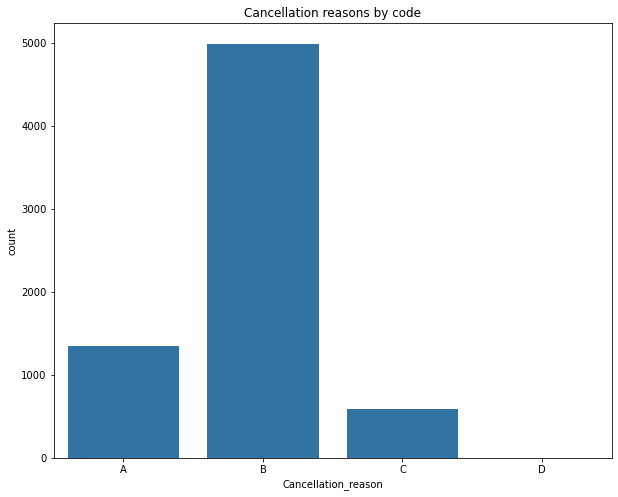

In [3]:
plt.figure(figsize=(10,8))
base_color=sb.color_palette()[0]
g=sb.countplot(data=df,x='CANCELLATION_CODE',color=base_color,order=['A','B','C','D'])
plt.xlabel('Cancellation_reason')
plt.ylabel('count')
plt.title('Cancellation reasons by code')

## (Visualization 2)

### What company has the highest number of flights during January 2020?

> The count plot is showing the WN (Southwest Airlines Co.) has the most flights during Jan 2020

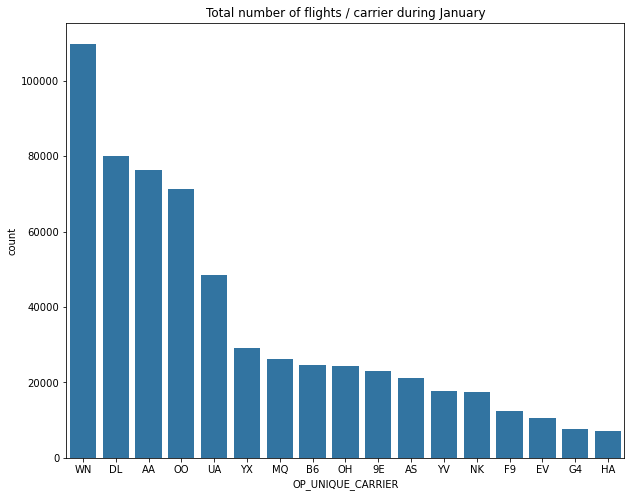

In [4]:
freq = df['OP_UNIQUE_CARRIER'].value_counts()

# Get the indexes of the Series
gen_order = freq.index

# Plot the bar chart in the decreasing order of the frequency of the `generation_id`
plt.figure(figsize=(10,8))
sb.countplot(data=df, x='OP_UNIQUE_CARRIER', color=base_color, order=gen_order)
plt.title('Total number of flights / carrier during January');

## (Visualization 3)

### How arrival time and arrival delay are related?

> There is a positive correlation between arrival delay and arrival time

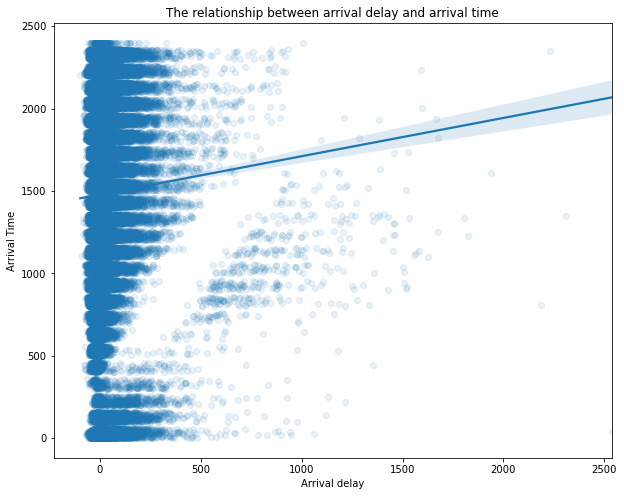

In [5]:
plt.figure(figsize=(10,8))
sb.regplot(data = df, x = 'ARR_DELAY', y = 'ARR_TIME', x_jitter=0.04, scatter_kws={'alpha':1/10}, fit_reg=True)
plt.xlabel('Arrival delay')
plt.ylabel('Arrival Time')
plt.title('The relationship between arrival delay and arrival time');

## (Visualization 4)

### What is the the relationship between cancellation code, distance and carrier?

> When looking deep in the above figure we will notice that cancellation by carrier associated with the longest distance has been occured by DL

> Weather cancellation doesn't exceed 1500 miles and the shortest distance associated with weather cancellation has been occured by MQ and OO carriers

> NK has the highest distance for weather cancellation.

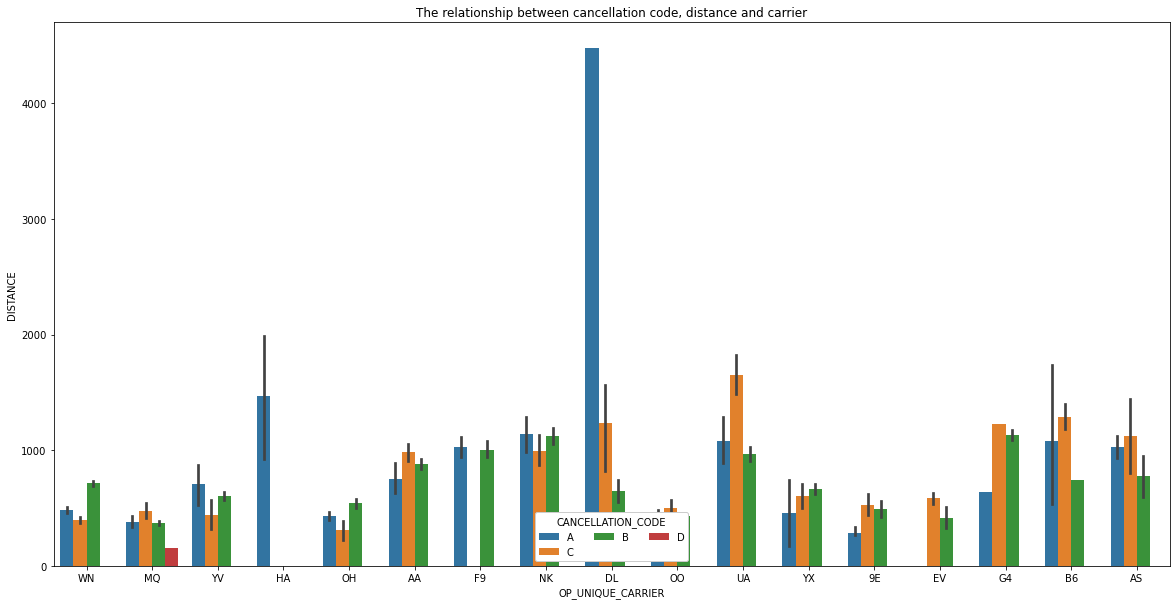

In [6]:
plt.figure(figsize=(20,10))
ax = sb.barplot(data = df, x = 'OP_UNIQUE_CARRIER', y = 'DISTANCE', hue = 'CANCELLATION_CODE')
ax.legend(loc = 8, ncol = 3, framealpha = 1, title = 'CANCELLATION_CODE')
plt.title('The relationship between cancellation code, distance and carrier');